In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Project4/titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['FamilySize'] = df['SibSp']+df['Parch']

In [7]:
df[['Name','SibSp','Parch','FamilySize']]

,Name,SibSp,Parch,FamilySize
0,"Braund, Mr. Owen Harris",1,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1
2,"Heikkinen, Miss. Laina",0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1
4,"Allen, Mr. William Henry",0,0,0
...,...,...,...,...
886,"Montvila, Rev. Juozas",0,0,0
887,"Graham, Miss. Margaret Edith",0,0,0
888,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,3
889,"Behr, Mr. Karl Howell",0,0,0


In [9]:
print("sebelum di drop :",df.shape)
df = df.dropna(subset=['Embarked'])
print("Setelah di drop :", df.shape)

sebelum di drop : (891, 13)
Setelah di drop : (889, 13)


In [10]:
df[['Embarked']]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [11]:
embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_one_hot], axis=1)

In [14]:
df[['Name', 'Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head()

,Name,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,"Braund, Mr. Owen Harris",S,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,1,0,0
2,"Heikkinen, Miss. Laina",S,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,0,0,1
4,"Allen, Mr. William Henry",S,0,0,1


In [15]:
df = df.drop('Embarked', axis=1)

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,3,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,1,0,0


In [18]:
df['Cabin'] = df['Cabin'].fillna('U')
df[['Name', 'Cabin']]

,Name,Cabin
0,"Braund, Mr. Owen Harris",U
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85
2,"Heikkinen, Miss. Laina",U
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123
4,"Allen, Mr. William Henry",U
...,...,...
886,"Montvila, Rev. Juozas",U
887,"Graham, Miss. Margaret Edith",B42
888,"Johnston, Miss. Catherine Helen ""Carrie""",U
889,"Behr, Mr. Karl Howell",C148


In [19]:
def take_initial(x):
    return x[0]
df['Cabin'] = df['Cabin'].apply(take_initial)
df[['Name', 'Cabin']].head()

,Name,Cabin
0,"Braund, Mr. Owen Harris",U
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
2,"Heikkinen, Miss. Laina",U
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C
4,"Allen, Mr. William Henry",U


In [20]:
cabin_one_hot = pd.get_dummies(df['Cabin'], prefix='Cabin')
df = pd.concat([df, cabin_one_hot], axis=1)

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,1,0,0,0,0,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,1,0,1,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,1,0,0,0,0,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,1,0,0,0,0,0,0


In [23]:
df = df.drop('Cabin', axis=1)

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U'],
      dtype='object')

In [35]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()
array = []
df['Title'] = df['Name'].apply(get_title)


In [36]:
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [45]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,0,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,0,0,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,1,0,0,0,0,0,0,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,1,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,1,0,0,0,0,0,0,Mr


In [39]:
title_one_hot = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, title_one_hot], axis=1)

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Title', 'Title_Capt',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,1,0,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,1,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,0,1,0,0,0,0,0


In [41]:
df = df.drop('Name', axis=1)

In [43]:
sex_one_hot = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, sex_one_hot], axis=1)

df = df.drop('Sex', axis=1)

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'Title', 'Title_Capt', 'Title_Col',
       'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'Sex_female', 'Sex_male'],
      dtype='object')

In [47]:
age_median = df.groupby('Title')['Age'].median()
age_median

Title
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              30.0
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [48]:
def fill_age(x):
    for index, age in zip(age_median.index, age_median.values):
        if x['Title']==index:
            print(index)
            return age
df['Age'] = df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

Mr
Mr
Mrs
Mr
Miss
Mr
Mrs
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Master
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mrs
Mr
Mr
Master
Mrs
Mr
Master
Miss
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Miss
Miss
Miss
Miss
Mr
Mrs
Mr
Miss
Mr
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Mr
Miss
Mrs
Mr
Mrs
Mr
Mr
Miss
Miss
Mr
Mrs
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mrs
Mr
Miss
Mr
Miss
Master
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Dr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Miss


In [49]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,FamilySize,Embarked_C,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,1,0,...,0,0,1,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,1,1,...,0,0,0,1,0,0,0,0,1,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,1,35.0,1,0,113803,53.1000,1,0,...,0,0,0,1,0,0,0,0,1,0
4,5,0,3,35.0,0,0,373450,8.0500,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,0,0,...,0,0,0,0,0,1,0,0,0,1
887,888,1,1,19.0,0,0,112053,30.0000,0,0,...,0,0,0,0,0,0,0,0,1,0
888,889,0,3,21.0,1,2,W./C. 6607,23.4500,3,0,...,0,0,0,0,0,0,0,0,1,0
889,890,1,1,26.0,0,0,111369,30.0000,0,1,...,0,0,1,0,0,0,0,0,0,1


In [50]:
df.dtypes

PassengerId             int64
Survived                int64
Pclass                  int64
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
FamilySize              int64
Embarked_C              uint8
Embarked_Q              uint8
Embarked_S              uint8
Cabin_A                 uint8
Cabin_B                 uint8
Cabin_C                 uint8
Cabin_D                 uint8
Cabin_E                 uint8
Cabin_F                 uint8
Cabin_G                 uint8
Cabin_T                 uint8
Cabin_U                 uint8
Title                  object
Title_Capt              uint8
Title_Col               uint8
Title_Don               uint8
Title_Dr                uint8
Title_Jonkheer          uint8
Title_Lady              uint8
Title_Major             uint8
Title_Master            uint8
Title_Miss              uint8
Title_Mlle              uint8
Title_Mme               uint8
Title_Mr  

In [52]:
df = df.drop(['PassengerId','Ticket','Title'], axis=1)

In [53]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
888,0,3,21.0,1,2,23.4500,3,0,0,1,...,0,0,0,0,0,0,0,0,1,0
889,1,1,26.0,0,0,30.0000,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [54]:
y = df['Survived'].values
X = df.iloc[:,1:].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

X_train : (711, 37)
X_test : (178, 37)
y_train : (711,)
y_test : (178,)


In [58]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/home/maghassiz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
print("Train Accuracy :", clf.score(X_train, y_train))
print("Test Accuracy :", clf.score(X_test, y_test))

Train Accuracy : 0.8368495077355836
Test Accuracy : 0.8426966292134831


In [63]:
print(X_test[0])

[ 2. 24.  0.  0. 13.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  1.]


In [64]:
test_predict = clf.predict(X_test)
test_predict

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0])

In [65]:
y_test

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0])

In [66]:
cm = confusion_matrix(y_test, test_predict)
cm

array([[111,  15],
       [ 13,  39]])

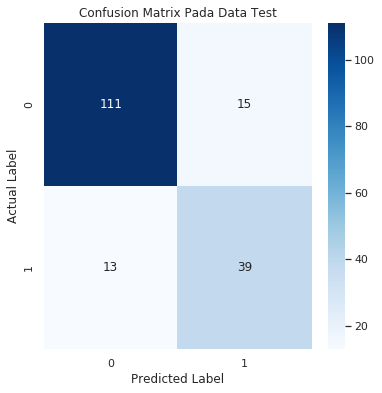

In [69]:
plt.figure(figsize=(6,6))
plt.title("Confusion Matrix Pada Data Test")
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()